In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import matplotlib.pyplot as plt

In [27]:
def preprocess(x,y):
    # normalized
    x = tf.cast(x,dtype = tf.float32) / 255.
    # 原(28X28) -> (28X28X1) 供 Model 使用之結構
    x = tf.reshape(x, [28,28,1])
    y = tf.cast(y,dtype = tf.int32)
    return x,y
(tr_data,tr_label),(te_data,te_label) = mnist.load_data()
# create dataset <(tr_label[0],tr_data[0]).....>
tr_db = tf.data.Dataset.from_tensor_slices((tr_data,tr_label))
# process data for CCN
map_db = tr_db.map(preprocess)
# shuffle and package
batchs =32
sh_p_db = map_db.shuffle(1000).batch(batchs)
# 查看處理後的數據
for x, y in sh_p_db.take(3):  # 取出前三個樣本進行觀察
    print("Data shape:", x.shape, "Data range:", (tf.reduce_min(x).numpy(), tf.reduce_max(x).numpy()))
    print("Label:", y.numpy())
# validation data
te_db = tf.data.Dataset.from_tensor_slices((te_data,te_label))
te_db = te_db.map(preprocess).batch(batch_size=batchs)

Data shape: (32, 28, 28, 1) Data range: (np.float32(0.0), np.float32(1.0))
Label: [9 2 8 4 8 2 7 4 9 9 8 3 9 2 7 9 9 4 1 3 1 5 9 2 4 3 1 6 1 9 0 0]
Data shape: (32, 28, 28, 1) Data range: (np.float32(0.0), np.float32(1.0))
Label: [1 5 4 8 1 7 0 3 8 0 8 0 5 9 1 5 8 7 2 2 3 2 7 6 3 8 3 3 2 8 7 8]
Data shape: (32, 28, 28, 1) Data range: (np.float32(0.0), np.float32(1.0))
Label: [4 1 0 2 2 6 2 2 7 8 4 1 1 1 4 6 0 7 9 4 5 9 4 2 1 6 3 2 2 9 8 9]


In [30]:
# create model for LeNet
# conv -> pooling -> conv -> pooling ->flation  
cnn = Sequential([
    # 6 個 5X5 卷積核
    Conv2D(6,kernel_size=5,strides=1,padding='same',activation='relu'),
    # 2X2 size
    MaxPooling2D(pool_size=2,strides=2),
    # 16 個 5X5 卷積核
    Conv2D(16,kernel_size=5,strides=1,padding='same',activation='relu'),
    # 2X2 size
    MaxPooling2D(pool_size=2,strides=2),
    # 展平
    Flatten(),
    #全連接層處理 120/84/10, 0~9 共10點，最後用softmax 以機率分布呈現
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])
# build weigh，並設定輸入data size為任意比數且(28,28,1)
cnn.build(input_shape=(None,28,28,1))
print(cnn.summary())
# Set optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# compile
cnn.compile(optimizer=opt,
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 120)                 │          94,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,786 (421.04 KB)

 Trainable params: 107,786 (421.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [31]:
# trainning
hist = cnn.fit(sh_p_db, epochs= 5, validation_data = te_db)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8672 - loss: 0.4554 - val_accuracy: 0.9533 - val_loss: 0.1511
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9638 - loss: 0.1183 - val_accuracy: 0.9702 - val_loss: 0.0910
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9728 - loss: 0.0882 - val_accuracy: 0.9710 - val_loss: 0.0920
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9772 - loss: 0.0724 - val_accuracy: 0.9775 - val_loss: 0.0681
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9802 - loss: 0.0619 - val_accuracy: 0.9801 - val_loss: 0.0613


In [33]:
cnn.save('LeNet_model.h5')

In [35]:
from tensorflow.keras.models import load_model
# 加載 SavedModel 格式
loaded_model = load_model('LeNet_model.h5')

# 使用加載的模型進行測試
loaded_model.summary()
result = loaded_model.evaluate(te_db)
print("Test Loss and Accuracy:", result)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 120)                 │          94,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,788 (421.05 KB)

 Trainable params: 107,786 (421.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9801 - loss: 0.0613
Test Loss and Accuracy: [0.06126771867275238, 0.9800999760627747]


In [48]:
import numpy as np

for x,y in sh_p_db.take(1):
    # 單張圖片預測
    result_single = cnn.predict(np.expand_dims(x[0], axis=0))
    print("Single Sample Prediction:", result_single)  # 返回一個數組，類別的概率分佈



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Single Sample Prediction: [[2.4491209e-08 5.2686861e-05 9.9982870e-01 9.5693304e-06 9.1624745e-05
  5.4662127e-07 1.3409789e-08 1.6813061e-05 3.4190624e-08 5.2019871e-11]]


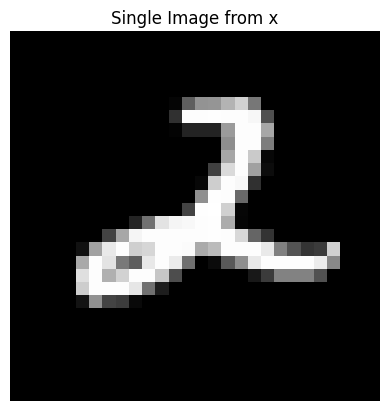

In [50]:
plt.imshow(x[0].numpy().squeeze(), cmap='gray')  # 使用 `squeeze()` 去掉最後一維
plt.title("Single Image from x")
plt.axis('off')  # 關閉坐標軸
plt.show()